In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

delta_t = 0.001

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"

In [86]:
G_obs = np.load("G_obs_large_MI.npy")
G_obs_labels = np.load("G_obs_large_MI_labels.npy", allow_pickle= True)
d = G_obs.shape[0]

In [87]:
my_order = [9,8,7,6,5,4,3,2,1,0] + [10,11,12,13,14,15,16,17,18,19] + [20,21,22,23,24,25,26,27,28,29] + [34,33,32,31,30] + [35,36,37,38,39,40,41,42,43,44,45,46] + [47,48,49,50,51,52,53,54,55,56,57]

In [88]:
G_obs_labels = G_obs_labels[my_order]
G_obs = G_obs[my_order,:][:,my_order]

In [89]:
# G_obs_labels[[9,8,7,6,5,4,3,2,1,0]]
# G_obs_labels[[10,11,12,13,14,15,16,17,18,19]]
# G_obs_labels[[20,21,22,23,24,25,26,27,28,29]]
# G_obs_labels[[34,33,32,31,30]]
# G_obs_labels[[35,36,37,38,39,40,41,42,43,44,45,46]]
# G_obs_labels[[47,48,49,50,51,52,53,54,55,56,57]]

In [90]:
def map_fun(label):
    if label.startswith("T_delay"):
        return '$T^D_{' + f"{label[8:]}" + '}$'

    if label.startswith("T_production"):
        return '$T^P_{' + f"{label[13:]}" + '}$'
    
    if label == "T_total":
        return '$T^T$'
    
    if label[0] == "T":
        return '$T^T_{' + f"{label[2:]}" + '}$'


    if label.startswith("M_delay"):
        return '$M^D_{' + f"{label[8:]}" + '}$'

    if label.startswith("M_production"):
        return '$M^P_{' + f"{label[13:]}" + '}$'
    
    if label == "M_total":
        return '$M^T$'
    
    if label[0] == "M":
        return '$M^T_{' + f"{label[2:]}" + '}$'

    return label


G_obs_labels_latex = list(map(lambda x : map_fun(x), G_obs_labels))

In [91]:
np.fill_diagonal(G_obs,0)

G_obs[G_obs < 0] = 0

In [92]:
np.linalg.eig(G_obs).eigenvalues.min()

-1.075923067867458

In [93]:
G_dir = ND(G_obs)

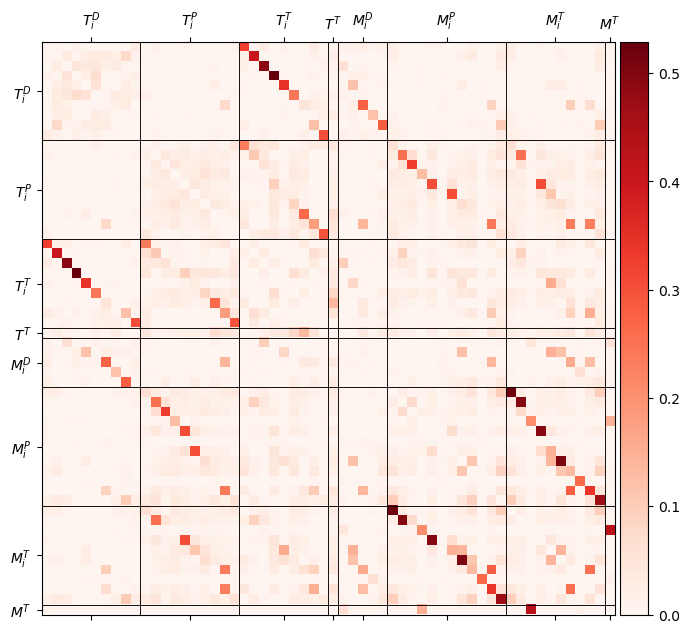

In [140]:

fig, ax = plt.subplots(1,1,figsize=(7,7))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

labels_select = G_obs_labels

plt.colorbar(r, cax=cax)

bs = [0,10,20,29,30,35,47,57,58]
for idx1, b1 in enumerate(bs[:-1]):
    for idx2, b2 in enumerate(bs[:-1]):
        ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))


centers = np.array(bs)
centers = (centers[1:] + centers[:-1])/2 -.5
ax.set_xticks(centers, ['$T^D_i$', '$T^P_i$', '$T^T_i$', '$T^T$','$M^D_i$', '$M^P_i$', '$M^T_i$', '$M^T$']);
ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$', '$T^T_i$', '$T^T$','$M^D_i$', '$M^P_i$', '$M^T_i$', '$M^T$']);

fig.tight_layout()

# plt.savefig(figures_path + "Cycle data/G_dir complete - symmetric.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "Cycle data/G_dir complete - symmetric.png", bbox_inches='tight')

In [128]:
G_obs_labels_latex

['$T^D_{1}$',
 '$T^D_{2}$',
 '$T^D_{3}$',
 '$T^D_{4}$',
 '$T^D_{5}$',
 '$T^D_{6}$',
 '$T^D_{7}$',
 '$T^D_{8}$',
 '$T^D_{9}$',
 '$T^D_{10}$',
 '$T^P_{1}$',
 '$T^P_{2}$',
 '$T^P_{3.1}$',
 '$T^P_{3.2}$',
 '$T^P_{4.2}$',
 '$T^P_{5}$',
 '$T^P_{6}$',
 '$T^P_{7}$',
 '$T^P_{9}$',
 '$T^P_{10}$',
 '$T^T_{1}$',
 '$T^T_{2}$',
 '$T^T_{3}$',
 '$T^T_{4}$',
 '$T^T_{5}$',
 '$T^T_{6}$',
 '$T^T_{7}$',
 '$T^T_{9}$',
 '$T^T_{10}$',
 '$T^T$',
 '$M^D_{3}$',
 '$M^D_{5}$',
 '$M^D_{7}$',
 '$M^D_{8}$',
 '$M^D_{9}$',
 '$M^P_{1}$',
 '$M^P_{2}$',
 '$M^P_{3.1}$',
 '$M^P_{3.2}$',
 '$M^P_{4.2}$',
 '$M^P_{4.3}$',
 '$M^P_{5}$',
 '$M^P_{6}$',
 '$M^P_{7}$',
 '$M^P_{8}$',
 '$M^P_{9}$',
 '$M^P_{10}$',
 '$M^T_{1}$',
 '$M^T_{2}$',
 '$M^T_{3}$',
 '$M^T_{4}$',
 '$M^T_{5}$',
 '$M^T_{6}$',
 '$M^T_{7}$',
 '$M^T_{8}$',
 '$M^T_{9}$',
 '$M^T_{10}$',
 '$M^T$']

In [113]:
np.arange(-.5, G_obs_labels_latex.__len__(), 1)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
       32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
       43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5,
       54.5, 55.5, 56.5, 57.5])

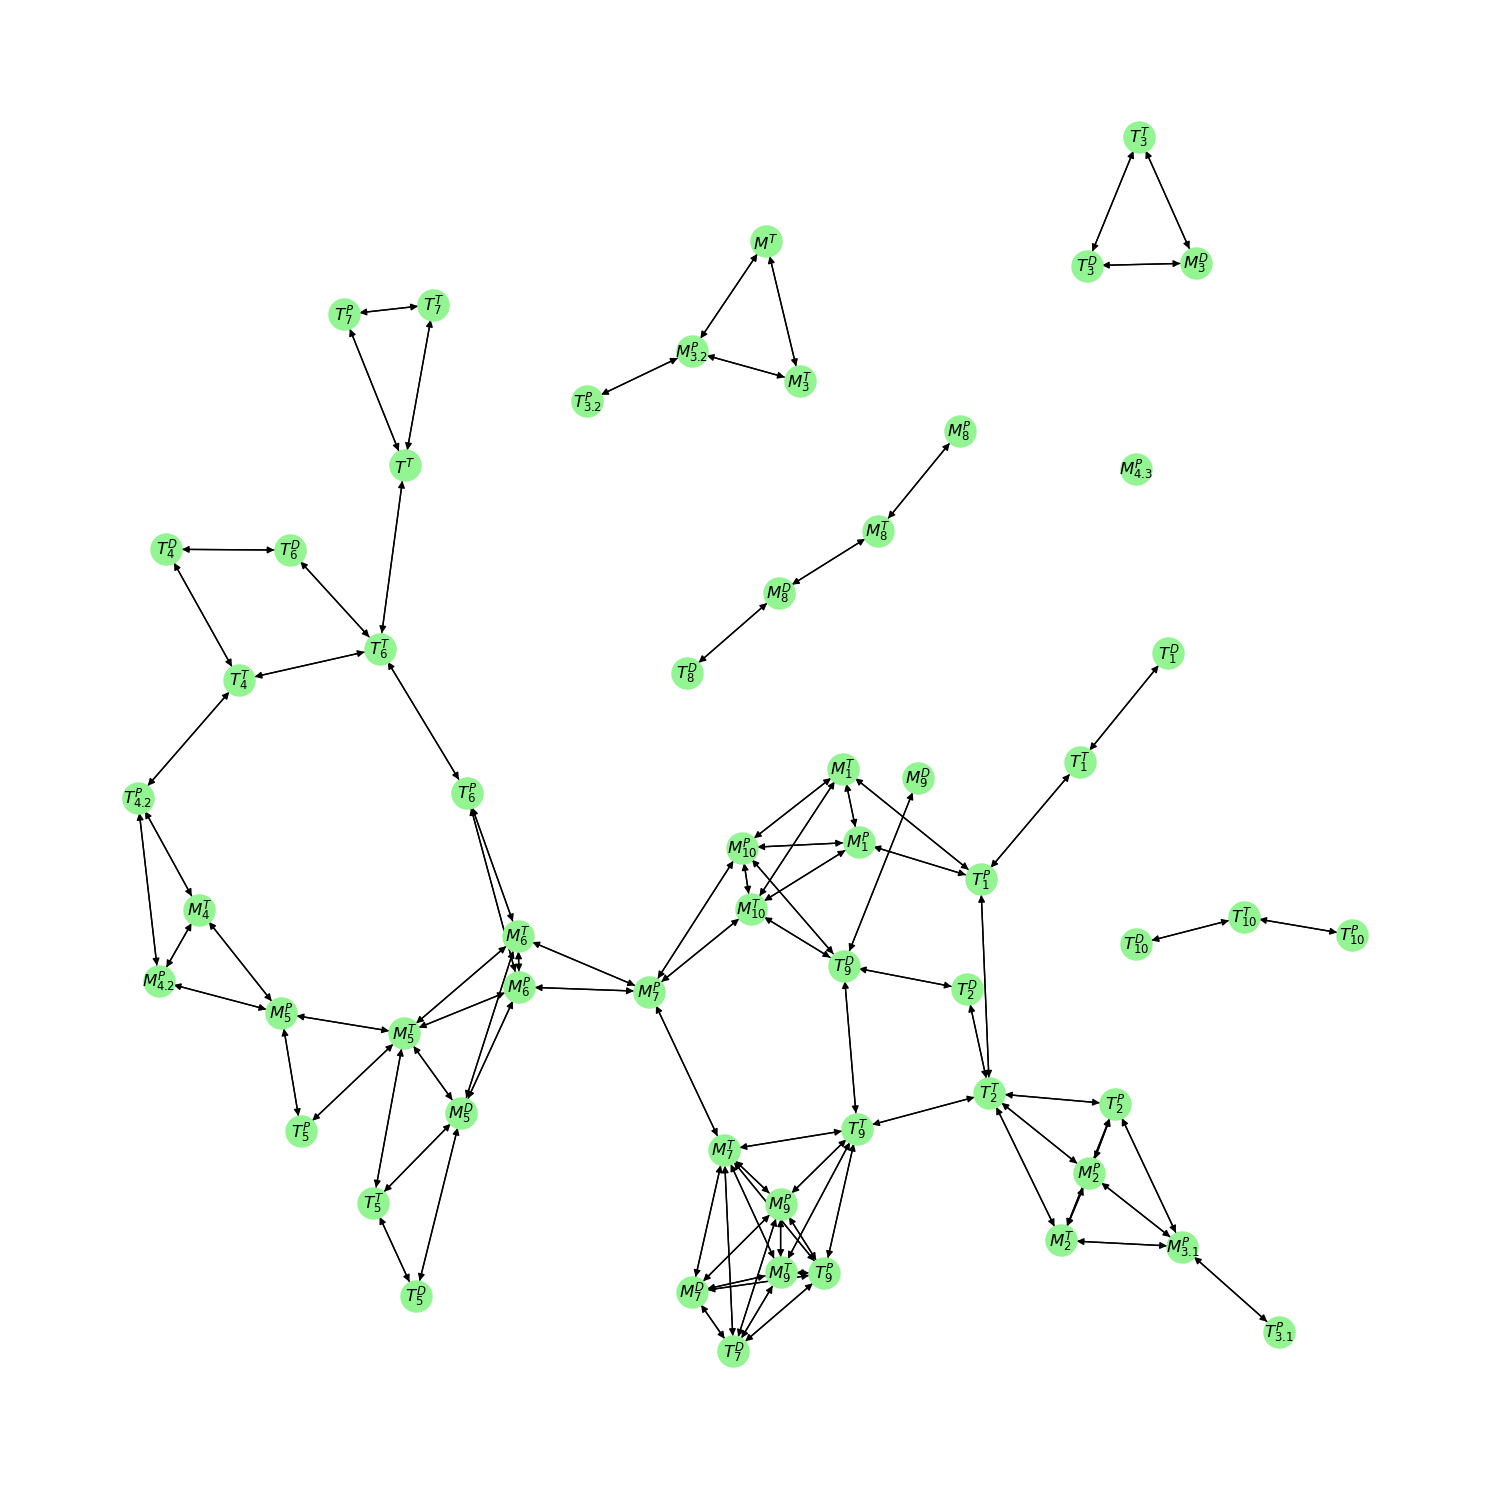

In [57]:
# graph plot
fig, ax = plt.subplots(1,1,figsize=(15,15))
gr = nx.from_numpy_array(G_dir > 0.06, create_using = nx.DiGraph)
pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(d), G_obs_labels_latex)} )
fig.tight_layout()
# plt.savefig(figures_path + "ND examples/Gaussian network 10 - G_dir as graph - symmetric.pdf", bbox_inches='tight')

In [60]:
G_obs_labels_latex

['$T^D_{10}$',
 '$T^D_{9}$',
 '$T^D_{8}$',
 '$T^D_{7}$',
 '$T^D_{6}$',
 '$T^D_{5}$',
 '$T^D_{4}$',
 '$T^D_{3}$',
 '$T^D_{2}$',
 '$T^D_{1}$',
 '$T^P_{1}$',
 '$T^P_{2}$',
 '$T^P_{3.1}$',
 '$T^P_{3.2}$',
 '$T^P_{4.2}$',
 '$T^P_{5}$',
 '$T^P_{6}$',
 '$T^P_{7}$',
 '$T^P_{9}$',
 '$T^P_{10}$',
 '$T^T_{1}$',
 '$T^T_{2}$',
 '$T^T_{3}$',
 '$T^T_{4}$',
 '$T^T_{5}$',
 '$T^T_{6}$',
 '$T^T_{7}$',
 '$T^T_{9}$',
 '$T^T_{10}$',
 '$T^T$',
 '$M^D_{9}$',
 '$M^D_{8}$',
 '$M^D_{7}$',
 '$M^D_{5}$',
 '$M^D_{3}$',
 '$M^P_{1}$',
 '$M^P_{2}$',
 '$M^P_{3.1}$',
 '$M^P_{3.2}$',
 '$M^P_{4.2}$',
 '$M^P_{4.3}$',
 '$M^P_{5}$',
 '$M^P_{6}$',
 '$M^P_{7}$',
 '$M^P_{8}$',
 '$M^P_{9}$',
 '$M^P_{10}$',
 '$M^T_{1}$',
 '$M^T_{2}$',
 '$M^T_{3}$',
 '$M^T_{4}$',
 '$M^T_{5}$',
 '$M^T_{6}$',
 '$M^T_{7}$',
 '$M^T_{8}$',
 '$M^T_{9}$',
 '$M^T_{10}$',
 '$M^T$']